In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import decimal

# Ошибки округления в сумме ряда
Сложим по сто членов геометрических прогрессий вида 1/k^i для k = 2, ..., 1000.

Результат в каждом случае должен быть примерно равен k/(k-1).

Сначала сложим просто так (forward), потом в обратном порядке (backward) и сравним погрешности с точной суммой ряда.

**NB**: точная сумма ряда тоже вычисляется с погрешностью (float64). Это позволяет пренебречь индексами k >= 100, т.к они всё равно не будут влезать в мантиссу.

In [2]:
m = 1000
n = 100

rng = np.arange(2, m, dtype='float')

forward = []
backward = []
ans = np.array([k/(k-1) for k in rng])

for k in rng:   
    forward.append(sum([k ** -i for i in np.arange(n)]))
    backward.append(sum([k ** -i for i in np.arange(n)[::-1]]))

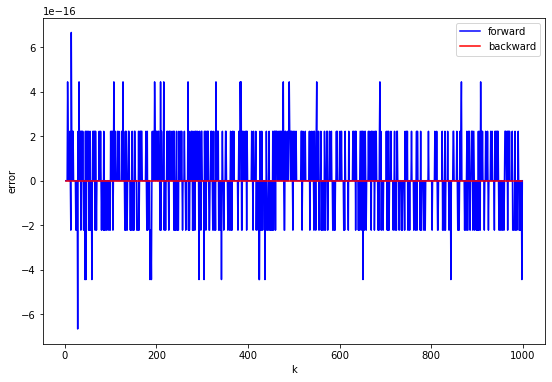

In [3]:
plt.figure(figsize=(9, 6))
plt.plot(rng, ans - forward,  'b', label='forward')
plt.plot(rng, ans - backward, 'r', label='backward')
plt.xlabel('k')
plt.ylabel('error')
plt.legend()
pass

Вывод: второй способ даёт более точный результат. Это объясняется тем, что в первом способе малые члены ряда имеют существенно меньший порядок, чем уже полученная сумма, и поэтому сильнее страдают от погрешности округления.

Кстати, благодаря тому, что все полученные суммы лежат в интервале [1, 2), мы можем видеть, как квантуется погрешность (с шагом 2^-52).